In [1]:
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import sympy
from sympy import *
from IPython.core.interactiveshell import InteractiveShell
from scipy.optimize import differential_evolution
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_blobs
from scipy.optimize import minimize
import math
from matplotlib.patches import Ellipse
from sklearn.mixture import GaussianMixture as GMM
from mpl_toolkits.mplot3d import Axes3D, art3d
from matplotlib.patches import Circle

In [2]:
InteractiveShell.ast_node_interactivity = "all"
plt.rcParams[ "figure.figsize" ] = (10,10)
origin2D = np.vstack([0,0])
origin3D = np.vstack([0,0,0])
scale = 10

# Chapter 05, Vector Calculus
#### Figure 5.1

In [3]:
# Init data.
ndata = int(scale*2)
bounds = [-scale/2,scale/2]
nvar = int(scale/2)
x = np.linspace(*bounds,ndata)
y = np.random.ranf(ndata)*3
# Init data.

/Users/vb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


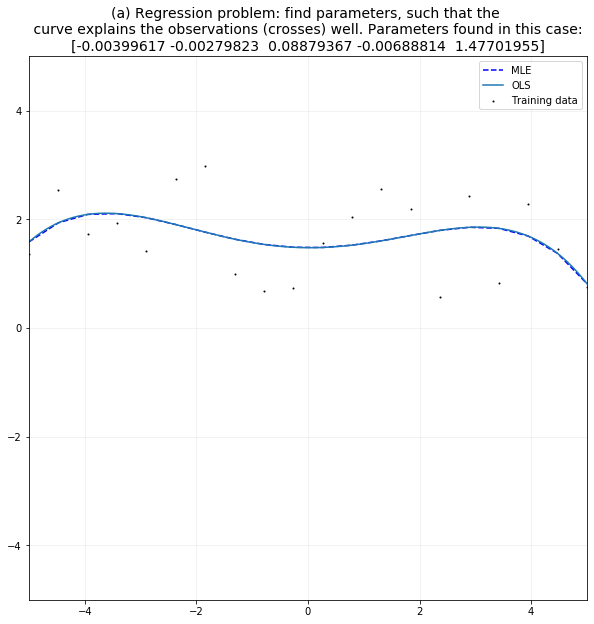

In [4]:
'''
This is a demonstration of maximum likelihood estimation (MLE) and
ordinary least squares (OLS) implemented using NumPy and SciPy.
'''

# Fitting a polynomial line to the data, using OLS.
# Credit to Boyd & Vandenberghe, VMLS.
polyfit = lambda x,y,z: npl.lstsq(np.vander(x,z),y)[0] # OLS Step
polyeval = lambda theta,x: np.matmul(np.vander(x,len(theta)),theta)
thetas = polyfit(x,y,nvar)
# Fitting a polynomial line to the data, using OLS.

# Fitting a polynomial line to the data, using MLE.
# Credit to https://jekel.me/ for some guidance.
likelihood = lambda error, n: (1/(2*math.pi*np.std(error)**2))**(n/2)*np.exp(-((np.dot(error.T,error))/(2*np.std(error)**2)))
var = np.ones(nvar)
def objective(var):
    yGuess = (var[4]*(x**4)) + (var[3]*(x**3)) + (var[2]*(x**2)) + (var[1]*x) + var[0]
    return (-1*np.log(likelihood(y-yGuess, float(len(yGuess)))))
bounds = [(-5,5), (-5,5), (-5,5), (-5,5), (-5,5)]
res = differential_evolution(objective,bounds)
# Fitting a polynomial line to the data, using MLE.

# Plotting.
plt.axis([-scale/2,scale/2,-scale/2,scale/2])
plt.grid(alpha=.2)

plt.scatter(x,y, color = 'k', s = 1)
plt.plot(x,(res.x[4]*(x**4))+(res.x[3]*(x**3))+(res.x[2]*(x**2)) + (res.x[1]*x) + res.x[0], '--b')
plt.plot(np.linspace(-5,5,1000),polyeval(thetas,np.linspace(-5,5,1000)))

plt.legend(["MLE","OLS","Training data"])
plt.title("(a) Regression problem: find parameters, such that the \n curve explains the observations (crosses) well." + " Parameters found in this case: \n" + str(thetas), size= 14);
# Plotting.

In [5]:
Matrix(res.x[::-1]) # MLE used in book, OLS added here to show similarity. 
Matrix(thetas)

Matrix([
[-0.00399627023541865],
[-0.00279830026257423],
[  0.0887962490964992],
[-0.00688727891994461],
[    1.47701107301494]])

Matrix([
[-0.00399616577313116],
[-0.00279822726339894],
[  0.0887936714770246],
[-0.00688814331634393],
[    1.47701955297521]])

In [6]:
rng = np.random.RandomState(42)
X, y_true = make_blobs(n_samples=600, centers=3,
                       cluster_std=0.75, random_state=0)
X = np.dot(X[:, ::-1], -rng.randn(2, 2))
X[:5]

array([[-2.24153053,  0.61265913],
       [-2.922143  , -1.70079515],
       [-2.59458439, -0.7709229 ],
       [-2.46714146, -3.779038  ],
       [-1.7488548 , -2.84775859]])

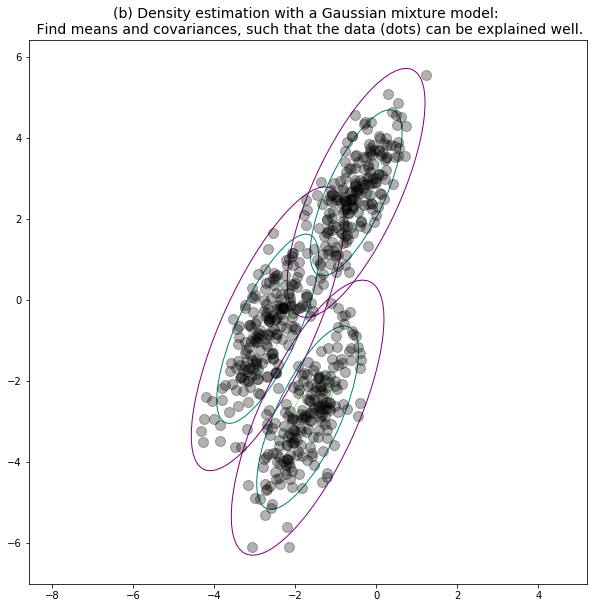

In [7]:
'''
See Jake VanderPlas, Gaussian Mixture Models in 
Python Data Science Handbook for more information 
on the following implementation.
'''

def draw_ellipse(position, covariance, ax=None, **kwargs):
    ax = plt.gca()
    
    # SVD to reshape covariance.
    U, s, Vt = np.linalg.svd(covariance)
    angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
    width, height = 2 * np.sqrt(s)
    
    # Plot ellipse.
    colors = ["","lightgreen","teal","purple"]
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, edgecolor = colors[nsig], **kwargs))
def plot_gmm(gmm, X, ax=None):
    # Fit data to GMM.
    labels = gmm.fit(X).predict(X)
    plt.axis('equal') # Neat trick for keeping axes equal.
    
    # Plot fit.
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, fc = "None")
    plt.scatter(X[:, 0], X[:, 1], s=100, alpha=.3, c='k', zorder=2)
        
gmm = GMM(n_components=3, random_state=0)
plot_gmm(gmm, X)
plt.title("(b) Density estimation with a Gaussian mixture model: \n Find means and covariances, such that the data (dots) can be explained well.", size = 14);

#### Figure 5.2
*Book provides mind map of relevant topics in vector calculus.*\
### Example 5.1 (Testing for Matrix Invertibility)

In [8]:
f = lambda x: x[0]**2+x[1]**2
someVec = np.vstack([3,2])
f(someVec), someVec.T@someVec

(array([13]), array([[13]]))

The above function is an example of a dot product that maps two values in $\mathbb{R}^2$ in a vector to a single value in $\mathbb{R}$.

## 5.1 Differentiation of Univariate Functions
#### Figure 5.3
*The average incline of a fucntion $f$ between $x_o$ and $x_0 + \delta x$ is the incline of the secant (blue) through $f(x_0)$ and $f(x_0 + \delta x)$ and given by $\frac{\delta y}{\delta x}$.*

Interactive derivative for $x^2$: https://editor.p5js.org/bartle/sketches/3wCzxK26q

In [9]:
x0dx = [2,3]
f = lambda x: x**3-5*x**2+10*x-10
ys = [f(x0dx[0]),f(x0dx[1])]

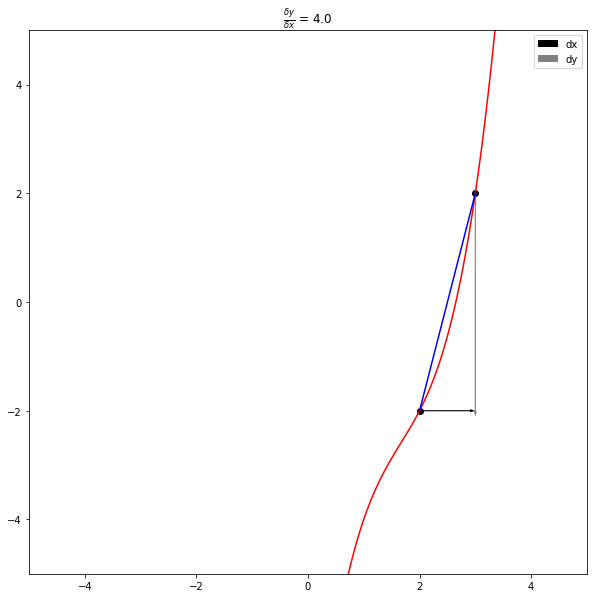

In [10]:
plt.plot(np.linspace(0,4,100),f(np.linspace(0,4,100)), c= "r")
plt.scatter(x0dx,ys, c = "k")
plt.plot(x0dx,ys, c= "b")
plt.quiver(*np.vstack([x0dx[0],ys[0]]),*[x0dx[1]-x0dx[0],0],scale=scale, width = .002, label = "dx")
plt.quiver(*np.vstack([x0dx[1],ys[1]]),*[0,-(ys[1]-ys[0])],scale=scale, width = .002, color = "grey", label = "dy")
plt.axis([-scale/2,scale/2,-scale/2,scale/2])
plt.title(r"$\frac{\delta y}{\delta x}$ = %1.1f" %((ys[1]-ys[0])/(x0dx[1]-x0dx[0])))
plt.legend();

**Definition 5.1** Difference quotient.
$$
\frac{\delta y}{\delta x} := \frac{f(x+\delta x) - f(x)}{\delta x}
$$
This can be interpreted as the average slope of $f$ between $x$ and $x+\delta x$, or the secant.


**Definition 5.2** Derivative.
$$
\frac{df}{dx} := \lim _{h\rightarrow 0}\frac{f(x+h) - f(x)}{h}
$$
This can be interpreted as the slope of a tangent line at a single point. 


### Example 5.2 (Derivative of a Polynomial)
*Book provides proof of the power rule.* 

$$
nx^{n-1}
$$

**The following is an example application of the power rule.**


In [11]:
x = Symbol('x')
curr = x**3-5*x**2+10*x-10
firstD = diff(curr)
firstD
lamFD = lambdify(x, firstD)
lamFD(1)

def derive(eq, iters):
    for i in list(range(iters)):
        curr = diff(eq) 
        eq = curr
    return eq

g = derive(derive(curr,2),1)
h = lambdify('x',g)
h(2)

3*x**2 - 10*x + 10

3

6

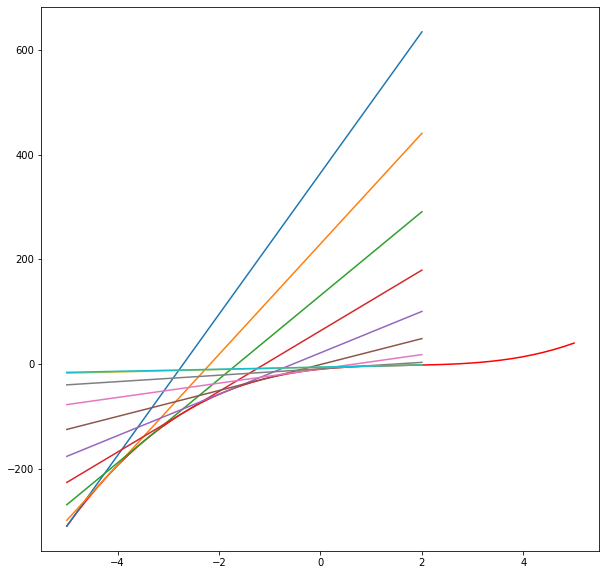

In [12]:
lineEq = lambda m,x,x1,y1: m*(x-x1)+y1 # Equation for a line given a point and slope.
initEq = lambda x: x**3-5*x**2+10*x-10
x = Symbol('x')
curr = x**3-5*x**2+10*x-10

def deriveOver(eq, listOfXs):
    '''
    Given a derivative count, 
    and given a range of X values, 
    visualize derivative in range.
    
    Only works for derivatives that are a line.
    '''
    eqDerivedTemp = derive(eq,1)
    eqDerived = lambdify('x',eqDerivedTemp)
    
    for i in listOfXs:
        currX = i
        currYtemp = lambdify('x', eq)
        currY = currYtemp(currX)
        currM = eqDerived(currX)
        plt.plot(listOfXs, lineEq(currM,listOfXs,currX,currY))

plt.plot(np.linspace(-scale/2,scale/2,50),f(np.linspace(-scale/2,scale/2,50)), c= "r")
deriveOver(curr, np.linspace(-5,2,10))

## 5.1.1 Taylor Series
Given a line produced by some function, f, and a point on that line, what function best approximates that line at that point? Taylor series takes a function and builds a polynomial that approximates it, with increasing accuracy based on increasing order of additional series.
$$
T_{\infty}(x) = \sum^{\infty}_{k=0}\frac{f^{(k)}(x_0)}{k!}{(x-x_0)^k}
$$
### Example 5.3 (Taylor Polynomial)

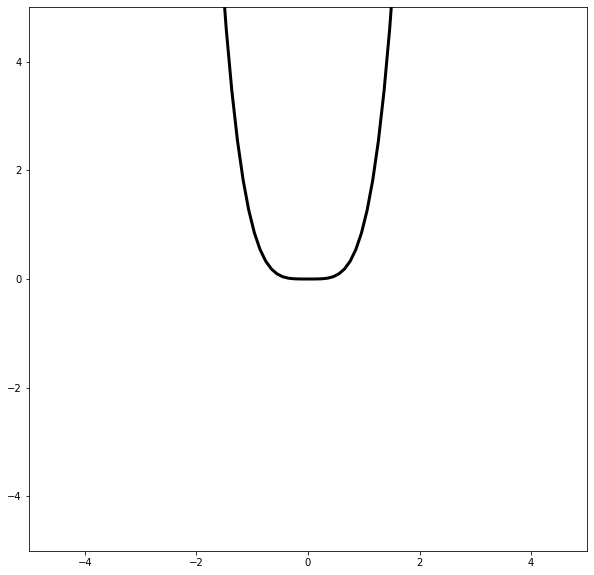

In [13]:
f = x**4
fLam = lambdify('x',f)
plt.plot(np.linspace(-scale/2,scale/2,100),fLam(np.linspace(-scale/2,scale/2,100)), lw= 3, c = "k")
plt.axis([-scale/2,scale/2,-scale/2,scale/2]);

In [14]:
xPoint = 1
count = 6
coeffs = [lambdify('x',derive(f,i))(xPoint) for i in list(range(count))]
factorials = [factorial(i) for i in list(range(count))]
poly = np.array(coeffs)/np.array(factorials)
Matrix(coeffs)
Matrix(factorials)
Matrix(poly)

Matrix([
[ 1],
[ 4],
[12],
[24],
[24],
[ 0]])

Matrix([
[  1],
[  1],
[  2],
[  6],
[ 24],
[120]])

Matrix([
[1],
[4],
[6],
[4],
[1],
[0]])

In [15]:
polynomial = [poly[i]*(x-1)**i for i in list(range(count))]
polyEq = polynomial[0]+polynomial[1]+polynomial[2]+polynomial[3]+polynomial[4]+polynomial[5]
polynomial
polyEq
simplify(polyEq)

[1, 4*x - 4, 6*(x - 1)**2, 4*(x - 1)**3, (x - 1)**4, 0]

4*x + (x - 1)**4 + 4*(x - 1)**3 + 6*(x - 1)**2 - 3

x**4

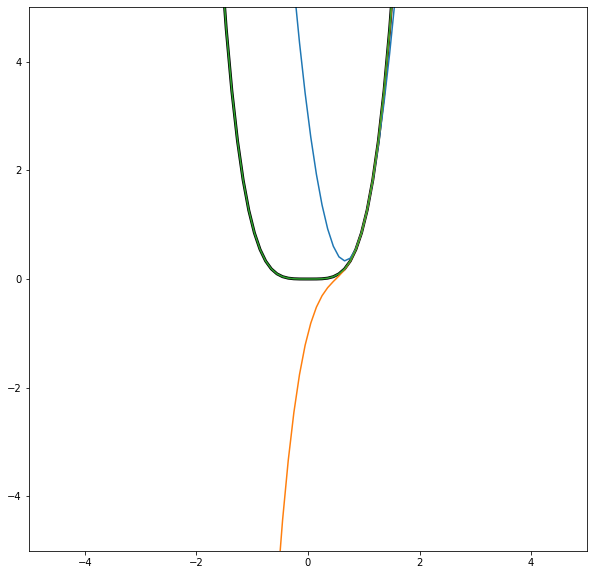

In [16]:
f = x**4
f1 = 4*x+6*(x-1)**2-3 #+ 4*(x-1)**3#+(x-1)**4
f2 = 4*x+6*(x-1)**2-3 + 4*(x-1)**3#+(x-1)**4
f3 = 4*x+6*(x-1)**2-3 + 4*(x-1)**3 +(x-1)**4

fLam = lambdify('x',f)
f1Lam = lambdify('x',f1)
f2Lam = lambdify('x',f2)
f3Lam = lambdify('x',f3)

plt.plot(np.linspace(-scale/2,scale/2,100),fLam(np.linspace(-scale/2,scale/2,100)), lw = 3, c = "k")
plt.plot(np.linspace(-scale/2,scale/2,100),f1Lam(np.linspace(-scale/2,scale/2,100)))
plt.plot(np.linspace(-scale/2,scale/2,100),f2Lam(np.linspace(-scale/2,scale/2,100)))
plt.plot(np.linspace(-scale/2,scale/2,100),f3Lam(np.linspace(-scale/2,scale/2,100)))
plt.axis([-scale/2,scale/2,-scale/2,scale/2]);

### Example 5.4 (Taylor Series)
#### Figure 5.4

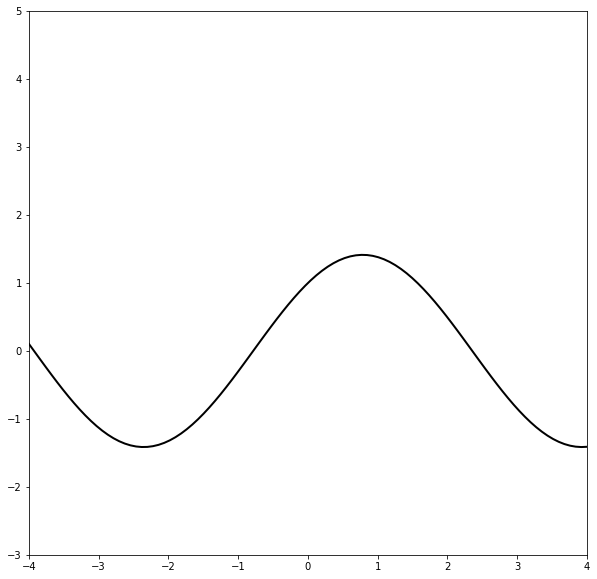

In [17]:
xs = np.linspace(-4,4,100)
point = 0
f = sin(x)+cos(x)
fLam = lambdify('x',f)
plt.plot(xs,fLam(xs), lw = 2, color = "k")
plt.axis([-4,4,-3,5]);

In [18]:
def taylor(function, start, approximationCount, linspace):
    '''
    This function builds a matrix of taylor series values
    where each row represents the solutions
    for each additional approximation term.
    The taylor polynomial equation can be found by adding row by row.
    '''
    x = Symbol('x')
    functions = [function]
    for i in list(range(1,approximationCount+1)):
        currPrime = function.diff(x)
        functions.append(currPrime)
        function = currPrime
    
    valueList = []
    for i in list(range(approximationCount)):
        currFunc = lambdify(x,functions[i])
        valueList.append((currFunc(start)/math.factorial(i))*(linspace-start)**i)
    return valueList,functions

approximationCount = 11
vList,functions = taylor(f, point, approximationCount, xs)
np.shape(vList)
functions

(11, 100)

[sin(x) + cos(x),
 -sin(x) + cos(x),
 -sin(x) - cos(x),
 sin(x) - cos(x),
 sin(x) + cos(x),
 -sin(x) + cos(x),
 -sin(x) - cos(x),
 sin(x) - cos(x),
 sin(x) + cos(x),
 -sin(x) + cos(x),
 -sin(x) - cos(x),
 sin(x) - cos(x)]

We can see a pattern here: The coefficients in our Taylor series are only $\pm$ 1, each of which occurs twice before switching to the other.
Thus, the full expansion of f at $x_0 = 0$ is given by the following.

$$
T_{\infty}(x) = \sum^{\infty}_{k=0}\frac{f^{(k)}(x_0)}{k!}{(x-x_0)^k} \\
= 1 + x - \frac{1}{2!}x^2 - \frac{1}{3!}x^3 + \frac{1}{4!}x^4 + \frac{1}{5!}x^5 - ... \\ 
= \color{orange}{1 - \frac{1}{2!}x^2 + \frac{1}{4!}x^4 \mp ... }+\color{blue}{ x - \frac{1}{3!}x^3 + \frac{1}{5!}x^5 \mp ... }\\
= \color{orange}{\sum^{\infty}_{k=0}(-1)^k \frac{1}{(2k)!}x^{2k}} + \color{blue}{\sum^{\infty}_{k=0}(-1)^k\frac{1}{(2k+1)!}x^{2k+1}} \\
= \color{orange}{\cos(x)} + \color{blue}{\sin(x)}
$$

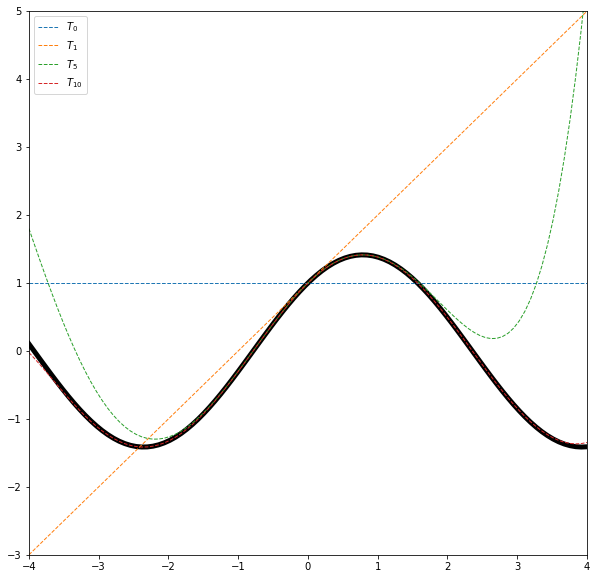

In [19]:
plt.plot(xs,fLam(xs),lw=5, color = "k", label="_nolegend_")
plt.axis([-4,4,-3,5])

currPlot = np.zeros((100))
legend = []
include = [0,1,5,10] 
for i in list(range(approximationCount)):
    currPlot += vList[i]
    if i in include:
        plt.plot(xs, currPlot, "--",lw=1)
        legend.append(r"$T_{%1.f}$"%i)
plt.legend(legend);

**Taylor polynomials.** The original function $f(x) = \sin(x) + \cos(x)$ (black, solid) is approximated by Taylor polynomials (dashed) around $x_0 = 0$. Higher-order Taylor polynomials approximate the function $f$ better and more globally. $T_{10}$ is already similar to $f$ in [-4,4].

Further visualization: https://editor.p5js.org/bartle/sketches/OhuE0hqC

## 5.1.2 Differentiation Rules
### Example 5.5 (Chain Rule)

In [20]:
fs = 2*x+1
gs = x**4
f = lambdify('x',fs)
g = lambdify('x',gs)
h = g(f(x))
hLam = lambdify('x',h)
h
hLam(1)

(2*x + 1)**4

81

In [21]:
dgs = diff(gs)
dfs = diff(fs)
dgsLam = lambdify('x',dgs)
dfsLam = lambdify('x',dfs)
dgs
dfs
dgsLam(fs)*dfs # Key step. We take the derivative of g, and plug in our initial f. 
               # Then multiply by the derivative of f.
diff(h)

4*x**3

2

8*(2*x + 1)**3

8*(2*x + 1)**3

## 5.2 Partial Differentiation and Gradients
*The generalization of the derviative to functions of several variables is the gradient which can be found by varying one variable at a time, keeping the rest constant -- the collection of these partial derivatives is the gradient.*
### Example 5.6 (Partial Derivatives Using the Chain Rule)

In [22]:
y = Symbol('y')
f = (x+2*y**3)**2
fLam = lambdify('x,y',f)
f
fLam(1,1)

(x + 2*y**3)**2

9

In [23]:
wrtX = diff(f,'x')
wrtY = diff(f,'y')
wrtXlam = lambdify('x,y',wrtX)
wrtYlam = lambdify('x,y',wrtY)
wrtX
wrtY

2*x + 4*y**3

12*y**2*(x + 2*y**3)

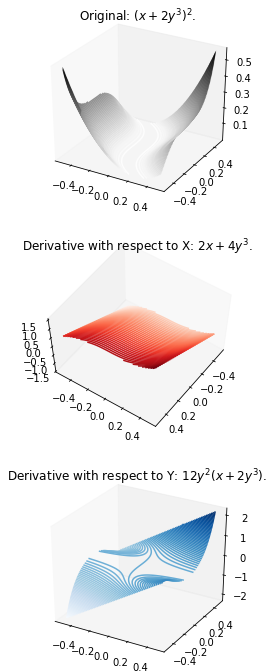

In [24]:
# Figure setup.
fig = plt.figure(figsize=plt.figaspect(3))
xs = np.linspace(-.5,.5,100)
ys = np.linspace(-.5,.5,100)
X,Y = np.meshgrid(xs,ys)
# Figure setup.

ax = fig.add_subplot(3, 1, 1, projection='3d')
ax.contour3D(X,Y,fLam(X,Y), 100, cmap='binary')
ax.grid(b=None)
ax.set_title(r"Original: $(x+2y^3)^2$.")

ax = fig.add_subplot(3, 1, 2, projection='3d')
ax.contour3D(X,Y,wrtXlam(X,Y), 50, cmap='Reds')
ax.view_init(60, 35)
ax.grid(b=None)
ax.set_title(r"Derivative with respect to X: $2x+4y^3$.")

ax = fig.add_subplot(3, 1, 3, projection='3d')
ax.contour3D(X,Y,wrtYlam(X,Y), 100, cmap='Blues')
ax.grid(b=None)
ax.set_title(r"Derivative with respect to Y: $12y^2(x+2y^3)$.");

You can see how the original is parabolic out of the fact that the inner term is squared, and $x^2$ is a parabola. The derivative with respect to X is linear, which can be reasoned as the sole x term in the original, recall that y=x is linear. The derivative with respect to Y explains the $2y^3$ term in the original, showing what is called a saddle point, and bearing resemblance to $x^3$. 

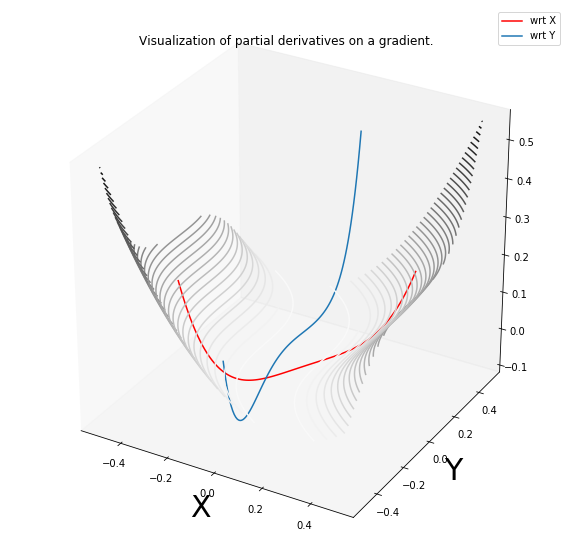

In [25]:
# Figure setup.
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_ylabel("Y",size=30)
ax.set_xlabel("X",size=30)
ax.grid(b=None)
ax.set_title("Visualization of partial derivatives on a gradient.")
# ax.view_init(60, 35) # Toggle for top view.
# Figure setup.

linspace = np.linspace(-.5,.5,100)
zeroes = np.linspace(0,0,100)
X,Y = np.meshgrid(linspace,linspace)
ax.contour3D(X,Y,fLam(X,Y), 50, cmap='binary')

# Recall:
lineEq = lambda m,x,x1,y1: m*(x-x1)+y1 # Equation for a line given a point and slope.

# WRT X.
currX = .2
currM = wrtXlam(currX,linspace)
currY = fLam(currX,currX)
ax.plot(linspace, zeroes, lineEq(currM,linspace,currX,currY), label="wrt X", c="r")

# WRT Y.
currX = .2
currM = wrtYlam(currX,linspace)
currY = fLam(currX,currX)
ax.plot(zeroes, linspace, lineEq(currM,linspace,currX,currY), label = "wrt Y")

ax.legend();

The above shows the partial derivatives with respect to x and y on the gradient composed of the two. This can be interpreted as moving the derivative with respect to X only in the Y direction and seeing it's shape change along the X, and vice versa for wrt Y. In other words, the partial derivative is the slope of a slice of a graph, when X or Y are 0, the resulting slopes for the slices at X and Y = 0, are illustrated above.

### Example 5.7 (Gradient)

In [26]:
f = x**2*y + x*y**3
fLam = lambdify('x,y',f)
f
fLam(1,1)

x**2*y + x*y**3

2

In [27]:
wrtX = diff(f,'x')
wrtY = diff(f,'y')
wrtXlam = lambdify('x,y',wrtX)
wrtYlam = lambdify('x,y',wrtY)
wrtX
wrtY

2*x*y + y**3

x**2 + 3*x*y**2

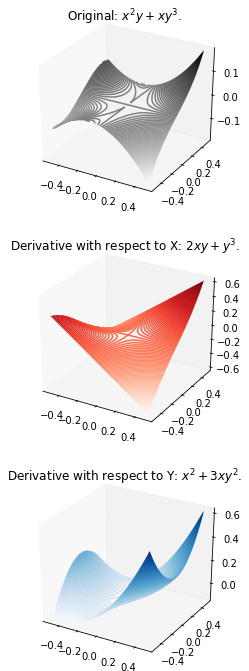

In [28]:
# Figure setup.
fig = plt.figure(figsize=plt.figaspect(3))
n = 150
xs = np.linspace(-.5,.5,n)
ys = np.linspace(-.5,.5,n)
X,Y = np.meshgrid(xs,ys)
# Figure setup.

ax = fig.add_subplot(3, 1, 1, projection='3d')
ax.contour3D(X,Y,fLam(X,Y), n, cmap='binary')
ax.grid(b=None)
ax.set_title(r"Original: $x^2y+xy^3$.")

ax = fig.add_subplot(3, 1, 2, projection='3d')
ax.contour3D(X,Y,wrtXlam(X,Y), n, cmap='Reds')
ax.grid(b=None)
ax.set_title(r"Derivative with respect to X: $2xy+y^3$.")

ax = fig.add_subplot(3, 1, 3, projection='3d')
ax.contour3D(X,Y,wrtYlam(X,Y), n, cmap='Blues')
ax.grid(b=None)
ax.set_title(r"Derivative with respect to Y: $x^2+3xy^2$.");

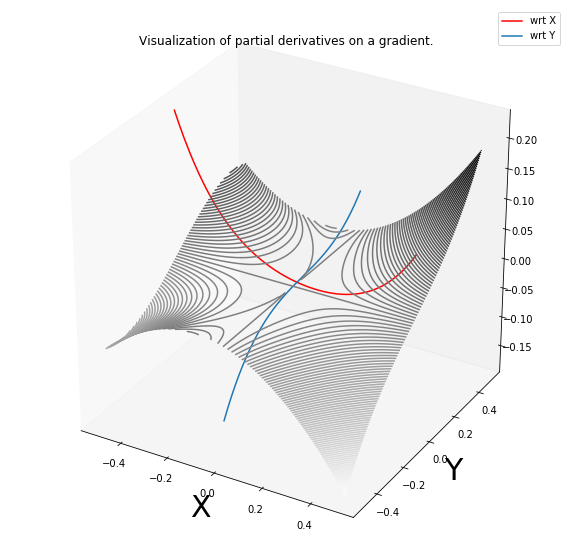

In [29]:
# Figure setup.
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_ylabel("Y",size=30)
ax.set_xlabel("X",size=30)
ax.grid(b=None)
ax.set_title("Visualization of partial derivatives on a gradient.")
# ax.view_init(60, 35) # Toggle for top view.
# Figure setup.

linspace = np.linspace(-.5,.5,n)
zeroes = np.linspace(0,0,n)
X,Y = np.meshgrid(linspace,linspace)
ax.contour3D(X,Y,fLam(X,Y), n, cmap='binary')

# Recall:
lineEq = lambda m,x,x1,y1: m*(x-x1)+y1 # Equation for a line given a point and slope.

currX=.2
# WRT X.
currM = wrtXlam(currX,linspace)
currY = fLam(currX,currX)
ax.plot(linspace, zeroes, lineEq(currM,linspace,currX,currY), label="wrt X", c="r")

# WRT Y.
currM = wrtYlam(currX,linspace)
currY = fLam(currX,currX)
ax.plot(zeroes, linspace, lineEq(currM,linspace,currX,currY), label = "wrt Y")

ax.legend();

## 5.2.1 Basic Rules of Partial Differentiation
Product rule: $(fg)^{'} = f^{'}g+fg^{'}$ <br>
Sum rule: $(f+g)^{'} = f^{'}+g^{'}$ <br>
Chain rule: $(g(f))^{'} = g^{'}(f)f^{'}$

## 5.2.2 Chain Rule
### Example 5.8

In [30]:
f = sin(x)**2 + 2*cos(x)
fLam = lambdify('x,y',f)
f
fLam(1,1)
diff(f,'x')
simplify(diff(f,'x'))

sin(x)**2 + 2*cos(x)

1.7886780300098506

2*sin(x)*cos(x) - 2*sin(x)

2*(cos(x) - 1)*sin(x)

The above is calculated by taking the partial derivative with respect to the sin(x) term, and adding it to the partial derivative with respect to the cos(x) term. 

This section also introduces the notion of gradients as matrix multiplications. Given that we are looking for the derivative of a function, whose variables are themselves functions, e.g. f(x,y) and x(s,t), y(s,t), we can construct the derivative as the partial derivatives of x and y, calling this the partial derivatives of 'X', then taking the derivative of 'X' with respect to s and t. 

I.E.:

$$
\frac{df}{d(s,t)} = \frac{\partial f}{\partial x}\frac{\partial x}{\partial (s,t)} = \left[ \frac{\partial f}{\partial x_1} \frac{\partial f}{\partial x_2} \right]\begin{bmatrix} \frac{\partial x_1}{\partial s} & \frac{\partial x_1}{\partial t} \\ \frac{\partial x_2}{\partial s} & \frac{\partial x_2}{\partial t} \end{bmatrix}.
$$

## 5.3 Gradients of Vector-Valued Functions
A vector valued function is one that has some amount of inputs, and the same amount of outputs as functions, whose evaluation represents a vector.

In [31]:
B = np.vstack([[1,0],[0,1]])
npl.det(B)

1.0

In [32]:
C = np.vstack([[-2,1],[1,1]])
abs(round(npl.det(C)))

3.0

In [33]:
J = np.vstack([[-2,1],[1,1]]) # Given that B is the canonical, to get from B to C, C is the transformation matrix.
Matrix(B@J)

Matrix([
[-2, 1],
[ 1, 1]])

#### Figure 5.5

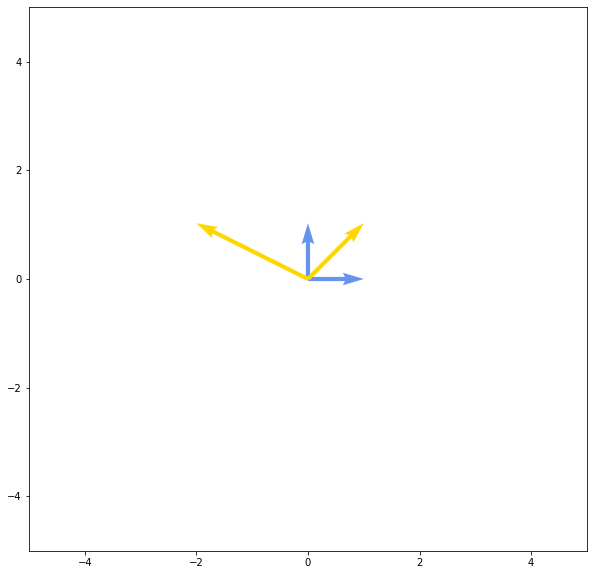

In [34]:
scale = 10
plt.quiver(*origin2D,*B[:,0], scale = scale, color = "cornflowerblue")
plt.quiver(*origin2D,*B[:,1], scale = scale, color = "cornflowerblue")
plt.quiver(*origin2D,*B@J[:,0], scale = scale, color = "gold")
plt.quiver(*origin2D,*B@J[:,1], scale = scale, color = "gold")
plt.axis([-scale/2,scale/2,-scale/2,scale/2]);

*The determinant of the Jacobian of $f$ can be used to compute the magnifier between the blue and orange area.*

In [35]:
y1 = -2*x+y
y2 = x + y
y1lam = lambdify('x,y', y1)
y2lam = lambdify('x,y', y2)
y1
y2
jacobian = np.matrix([[diff(y1,"x"),diff(y1,"y")],[diff(y2,"x"),diff(y2,"y")]]).astype(int)
Matrix(jacobian)
abs(round(npl.det(jacobian)))

-2*x + y

x + y

Matrix([
[-2, 1],
[ 1, 1]])

3.0

*Geometrically, the Jacobian determinant gives the magnification/scaling factor when we transform an area or volume.*
#### Figure 5.6 
*Book provides a visual for thinking about dimensionality of partial derivatives.*
### Example 5.9 (Gradient of a Vector-Valued Function)
*Book provides the general form of collecting partial derivatives in the Jacobian to obtain the gradient.*
### Example 5.10 (Chain Rule)

In [36]:
f = exp(x*y**2)
fLam = lambdify('x,y',f)
f
fLam(1,1)

exp(x*y**2)

2.718281828459045

In [37]:
t = Symbol('t')
g1 = t*cos(t)
g2 = t*sin(t)
g1Lam = lambdify('t', g1)
g2Lam = lambdify('t', g2)
g1
g1Lam(1)
g2
g2Lam(1)
f
fLam(g1Lam(1),g2Lam(1))
h = f.subs([(x,g1),(y,g2)])
h

t*cos(t)

0.5403023058681398

t*sin(t)

0.8414709848078965

exp(x*y**2)

1.4660529193809522

exp(t**3*sin(t)**2*cos(t))

In [38]:
dfX = diff(f,'x') # Derivatives for f with respect to both variables, x and y.
dfY = diff(f,'y')
dg1 = diff(g1,'t') # Derivatives for both g's with respect to variable, t.
dg2 = diff(g2,'t') 
dfdx = Matrix([[dfX, dfY]])
dfdt = Matrix([dg1,dg2])
dfdx
dfdt
Mul(dfdx,dfdt)

Matrix([[y**2*exp(x*y**2), 2*x*y*exp(x*y**2)]])

Matrix([
[-t*sin(t) + cos(t)],
[ t*cos(t) + sin(t)]])

Matrix([[2*x*y*(t*cos(t) + sin(t))*exp(x*y**2) + y**2*(-t*sin(t) + cos(t))*exp(x*y**2)]])

### Example 5.11 (Gradient of a Least-Squares Loss in a Linear Model)

In [39]:
e = Symbol('e')
diff(e**2)

2*e

In [40]:
x = Symbol('X')
y = Symbol('y')
t = Symbol('t')
diff(y-x*t,'t')

-X

In [41]:
n = 50
x = np.linspace(0,1,n)
noiseY = np.vstack((np.tan(x * np.pi) + np.random.random(size = n))) # Some equation.
X = np.vstack([[1, i] for i in x])

T0, T1 = np.meshgrid(np.linspace(-4,4,n),np.linspace(-4,4,n))
Thetas = np.vstack(list(zip(np.ravel(T0), np.ravel(T1))))
Matrix(Thetas[:5])
Matrix(noiseY[:5])

Matrix([
[             -4.0, -4.0],
[-3.83673469387755, -4.0],
[ -3.6734693877551, -4.0],
[-3.51020408163265, -4.0],
[ -3.3469387755102, -4.0]])

Matrix([
[0.826673494524096],
[0.198507038584962],
[0.522851304231075],
[0.204727314468293],
[0.344360495752893]])

In [42]:
def cost(x,y,t):
    m = np.size(y)
    h = X @ t
#     return npl.norm(y-h)**2 # Same loss function as below.
    return (y-h).T@(y-h)
#     return (1./(2*m)) * (h - y).T @ (h - y); # An optimized loss function.
    
Z = np.array([cost(X,noiseY,np.vstack(t)) for t in Thetas]).reshape(T0.shape)
np.shape(Z)
Matrix(Z[:,0:1][:10])

(50, 50)

Matrix([
[4415.09399231899],
[4360.67951095845],
[4307.16261478776],
[4254.54330380691],
[4202.82157801591],
[4151.99743741475],
[4102.07088200343],
[4053.04191178196],
[4004.91052675034],
[3957.67672690855]])

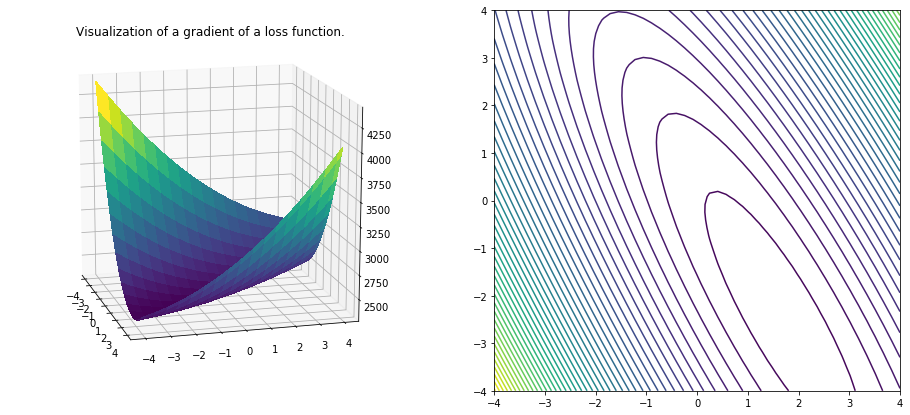

In [43]:
fig = plt.figure(figsize = (16,7))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_title("Visualization of a gradient of a loss function.")
ax.plot_surface(T0, T1, Z, rstride = 3, cstride = 3, cmap = 'viridis',antialiased=False)
ax.view_init(15, -15)

ax = fig.add_subplot(1, 2, 2)
ax.contour(T0, T1, Z, n, cmap = 'viridis');

For further reading on visualizing gradients, as well as gradient descent, visit https://xavierbourretsicotte.github.io/. 

## 5.4 Gradients of Matrices
#### Figure 5.7
*Book shows construction of a multidimensional array via collating versus via flatting and reshaping.*
### Example 5.12 (Gradient of Vectors with Respect to Matrices)
### Example 5.13 (Gradient of Matrices with Respect to Matrices)
*Book provides structure for gradients wrt Vectors and Matrices.*
## 5.5 Useful Identities for Computing Gradients
## 5.6 Backpropagation and Automatic Differentiation
*Book provides the theory for `backprop` and `autodiff`, see `derive`, `deriveOver`, and `taylor`, defined above for partial implementations.*
### Example 5.14

In [44]:
x = Symbol('x')
f = sqrt(x**2 + exp(x**2)) + cos(x**2+exp(x**2))
fLam = lambdify('x',f)
f
fLam(1)

sqrt(x**2 + exp(x**2)) + cos(x**2 + exp(x**2))

1.0900122119747424

The above can also be implemented with intermediate variables, which is analogous to the chain rule for the derivative of a function composition. 

In [45]:
a = x**2
b = exp(a)
c = a + b
d = sqrt(c)
e = cos(c)
f = d + e
f

sqrt(x**2 + exp(x**2)) + cos(x**2 + exp(x**2))

This method can save computation time which is evident in this example as $exp(x^2)$ is only calculated once.

The book further provides the chain rule for each step of composition.

#### Figure 5.11
*Book provides a graph for the intermediate variables composing a function.* 

## 5.7 Higher-Order Derivatives
We are interested in applying partial derivatives and the chain rule, to multivariable derivatives of higher order, e.g. multivariable Taylor series. 
#### Figure 5.12
*Linear approximation of a function. The original function f is linearized at $x_0 = -2$ using a first-order Taylor series expansion.*

In [46]:
xs = np.linspace(-4,4,100)
point = -2
f = sin(x)+cos(x)
fLam = lambdify('x',f)
fdLam = lambdify('x',diff(f))
derived = fLam(point)+(fdLam(point)*(xs-point))
f
derived

sin(x) + cos(x)

array([-2.31174544e+00, -2.27189489e+00, -2.23204434e+00, -2.19219379e+00,
       -2.15234323e+00, -2.11249268e+00, -2.07264213e+00, -2.03279157e+00,
       -1.99294102e+00, -1.95309047e+00, -1.91323992e+00, -1.87338936e+00,
       -1.83353881e+00, -1.79368826e+00, -1.75383771e+00, -1.71398715e+00,
       -1.67413660e+00, -1.63428605e+00, -1.59443549e+00, -1.55458494e+00,
       -1.51473439e+00, -1.47488384e+00, -1.43503328e+00, -1.39518273e+00,
       -1.35533218e+00, -1.31548163e+00, -1.27563107e+00, -1.23578052e+00,
       -1.19592997e+00, -1.15607941e+00, -1.11622886e+00, -1.07637831e+00,
       -1.03652776e+00, -9.96677203e-01, -9.56826650e-01, -9.16976098e-01,
       -8.77125545e-01, -8.37274992e-01, -7.97424439e-01, -7.57573887e-01,
       -7.17723334e-01, -6.77872781e-01, -6.38022228e-01, -5.98171676e-01,
       -5.58321123e-01, -5.18470570e-01, -4.78620017e-01, -4.38769465e-01,
       -3.98918912e-01, -3.59068359e-01, -3.19217806e-01, -2.79367254e-01,
       -2.39516701e-01, -

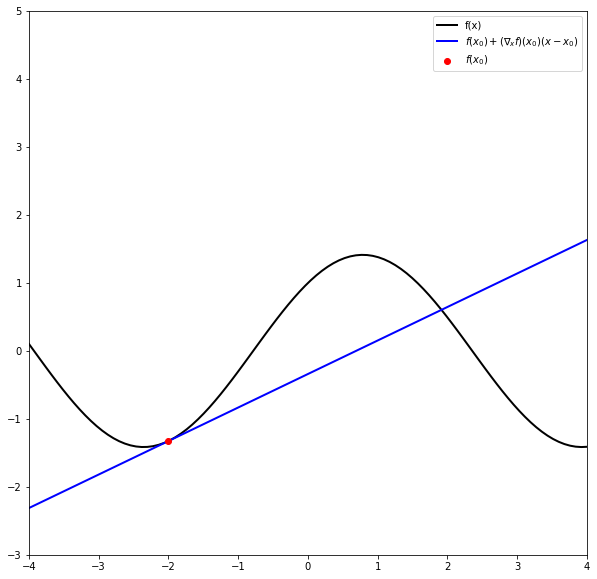

In [47]:
plt.plot(xs,fLam(xs), lw = 2, color = "k",zorder=1, label = "f(x)")
plt.scatter(point,fLam(point), color = 'r',zorder=2, label = r'$f(x_0)$')
plt.plot(xs,derived, lw = 2, color = "b",zorder=1, label = r"$f(x_0)+(\nabla_xf)(x_0)(x-x_0)$")
plt.axis([-4,4,-3,5])
plt.legend(loc=1);

#### Figure 5.13
*Visualizing outter product. Outer products of vectors increase the dimensionality of the array by 1 per term. (a) The outer product of two vectors results in a matrix; (b) the outer product of three vectors yields a third-order tensor.*

In [48]:
a = np.vstack([1,2,3,4])
b = np.vstack([4,3,2,1])
np.dot(a,b.T) # or, np.outer()

array([[ 4,  3,  2,  1],
       [ 8,  6,  4,  2],
       [12,  9,  6,  3],
       [16, 12,  8,  4]])

In [49]:
c = np.vstack([5,6,7,8])
np.outer(a@b.T,c).reshape(4,4,4)

array([[[ 20,  24,  28,  32],
        [ 15,  18,  21,  24],
        [ 10,  12,  14,  16],
        [  5,   6,   7,   8]],

       [[ 40,  48,  56,  64],
        [ 30,  36,  42,  48],
        [ 20,  24,  28,  32],
        [ 10,  12,  14,  16]],

       [[ 60,  72,  84,  96],
        [ 45,  54,  63,  72],
        [ 30,  36,  42,  48],
        [ 15,  18,  21,  24]],

       [[ 80,  96, 112, 128],
        [ 60,  72,  84,  96],
        [ 40,  48,  56,  64],
        [ 20,  24,  28,  32]]])

### Example 5.15 (Taylor Series expansion of a Function with Two Variables)

In [50]:
f = x**2+2*x*y + y**3
fLam = lambdify('x,y',f)
f
point = (1,2)
fLam(*point)

x**2 + 2*x*y + y**3

13

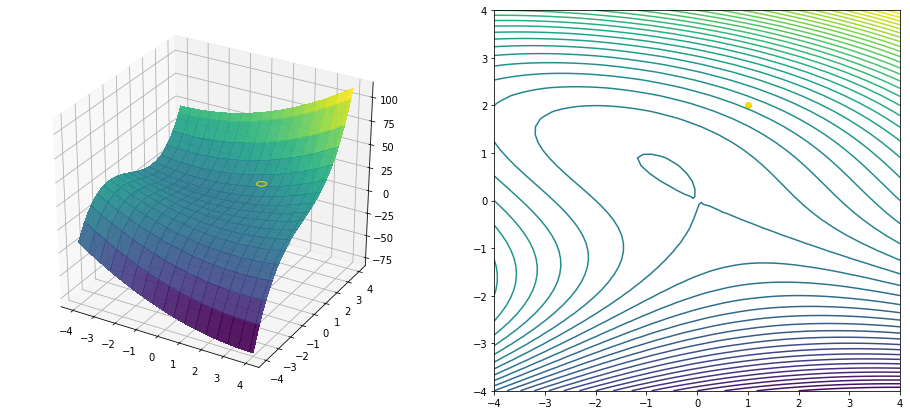

In [51]:
# Plotting initial function and point
fig = plt.figure(figsize = (16,7))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(T0, T1, fLam(T0,T1), alpha = .9, rstride = 3, cstride = 3, cmap = 'viridis',antialiased=False)

p = Circle((point[0],point[1]), .2, ec='gold', fc="none")
ax.add_patch(p)
art3d.pathpatch_2d_to_3d(p, z=fLam(1,2), zdir="z")

ax = fig.add_subplot(1, 2, 2)
ax.contour(T0, T1, fLam(T0,T1), n, cmap = 'viridis')
ax.scatter(1,2,c="gold");

In [52]:
fdx = diff(f,'x')
fdy = diff(f,'y')
fdx
fdy
a = lambdify('x,y',fdx)(*point)
b = lambdify('x,y',fdy)(*point)
leftTemp = np.array([a,b])
Matrix(leftTemp).T

2*x + 2*y

2*x + 3*y**2

Matrix([[6, 14]])

From here, recall the Taylor Polynomial.
$$
T_n(x) = \sum^n_{k=0}\frac{D^k_xf(x_0)}{k!}\delta^k.
$$

Where $\delta$ is a difference vector, $x-x_0$.

In [53]:
rightTemp = np.vstack((np.array([x,y])-point))
rightTemp
f1 = (Matrix(leftTemp).T@Matrix(rightTemp))[0]
f1Lam = lambdify('x,y',f1)
f1
f1Lam(1,2)

array([[x - 1],
       [y - 2]], dtype=object)

6*x + 14*y - 34

0

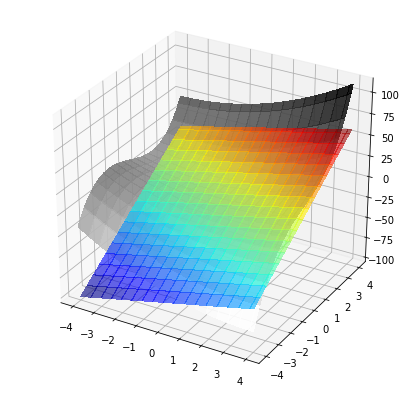

In [54]:
# Plotting taylor series, starting at f(1,2)+f1.
fig = plt.figure(figsize = (16,7))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(T0, T1, fLam(T0,T1), alpha = .9, rstride = 3, cstride = 3, cmap = 'binary',antialiased=False)
ax.plot_surface(T0, T1, fLam(1,2)+f1Lam(T0,T1), alpha = .6, rstride = 3, cstride = 3, cmap = 'jet',antialiased=False);

In [55]:
xx = diff(fdx,'x')
yy = diff(fdy,'y')
xy = diff(fdx,'y')
yx = diff(fdy,'x')
xx
yy
xy
yx

2

6*y

2

2

And recall the Hessian, which measures the curvature of a function locally around $(x,y)$.
$$
H = \begin{bmatrix} \frac{\delta^2f}{\delta x^2} & \frac{\delta^2f}{\delta x \delta y} \\ \frac{\delta^2f}{\delta y \delta x} & \frac{\delta^2f}{\delta y^2} \end{bmatrix}.
$$

In [56]:
hess = np.vstack([[xx,xy],[yx,yy]])
hessLam = lambdify('x,y',hess)
hess
np.vstack(hessLam(1,2))

array([[2, 2],
       [2, 6*y]], dtype=object)

array([[ 2,  2],
       [ 2, 12]])

For the 2nd iterations we follow the initial series expansion form.

In [57]:
f2 = (Matrix(rightTemp.T)@(Matrix(hessLam(1,2))/2)@Matrix(rightTemp))[0]
f2Lam = lambdify('x,y',f2)
f2
f2Lam(1,2)

(x - 1)*(x + y - 3) + (y - 2)*(x + 6*y - 13)

0

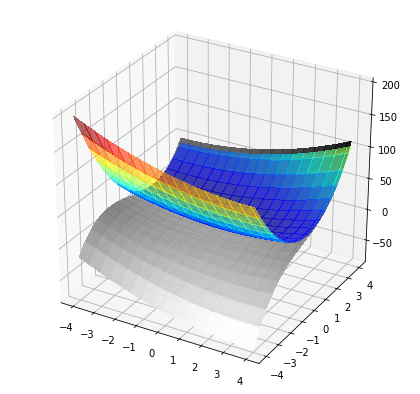

In [58]:
# Summing f1 and f2.
fig = plt.figure(figsize = (16,7))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(T0, T1, fLam(T0,T1), alpha = .9, rstride = 3, cstride = 3, cmap = 'binary',antialiased=False);
ax.plot_surface(T0, T1, fLam(1,2)+f1Lam(T0,T1)+f2Lam(T0,T1), alpha = .6, rstride = 3, cstride = 3, cmap = 'jet',antialiased=False);

3rd.

In [59]:
Matrix(rightTemp.T)@np.matrix(diff(hess,'x')).reshape(2,2)
f3 = (Matrix(rightTemp.T)@np.matrix(diff(hess,'y')).reshape(2,2)/math.factorial(3)@rightTemp**2)[0]
f3Lam = lambdify('x,y',f3)
f3
f3Lam(1,2)

Matrix([[0, 0]])

(y - 2)**3

0

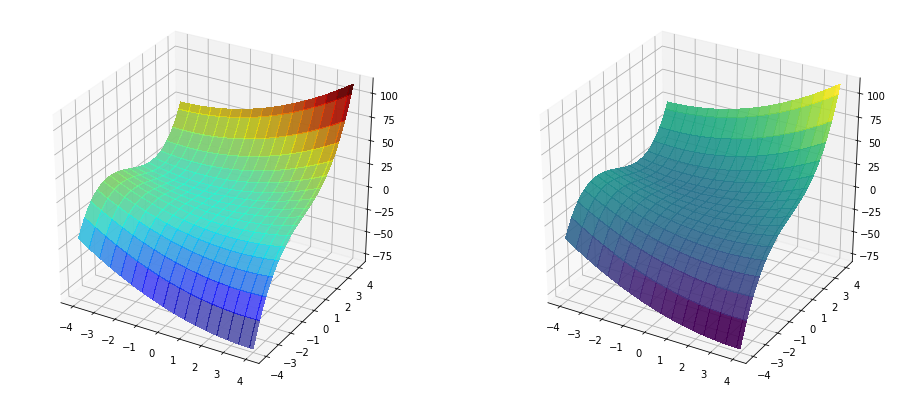

In [60]:
# Summing f1 and f2.
fig = plt.figure(figsize = (16,7))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(T0, T1, fLam(T0,T1), alpha = .9, rstride = 3, cstride = 3, cmap = 'binary',antialiased=False);
ax.plot_surface(T0, T1, fLam(1,2)+f1Lam(T0,T1)+f2Lam(T0,T1)+f3Lam(T0,T1), alpha = .6, rstride = 3, cstride = 3, cmap = 'jet',antialiased=False);

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_surface(T0, T1, fLam(T0,T1), alpha = .9, rstride = 3, cstride = 3, cmap = 'viridis',antialiased=False);

In [61]:
np.allclose(fLam(1,2)+f1Lam(T0,T1)+f2Lam(T0,T1)+f3Lam(T0,T1),fLam(T0,T1))

True